In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import sklearn.model_selection as sklms
import sklearn.neighbors as sklnb
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.linear_model
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

%matplotlib inline

In [2]:
#create confusion matrix
def performace(y_test,y_pred):
    m1 = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("confusionmatrix:")
    print( m1 )
    print(f"accuracy:{acc}")
    print(f"precision:{pre}")
    print(f"recall:{rec}")
    print(f"F1-score:{f1}")

In [3]:
# read the data
df = pd.read_csv('C:/Users/36055/OneDrive/桌面/SML Slides/train.csv')
df.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


In [4]:
# tranfer female and male to 1 and 0 
df["Lead"]. replace("Female", 1, inplace = True )
df["Lead"]. replace ("Male", 0, inplace = True )

In [5]:
# summarize the data
df.describe()

#get the columns
df_col=df.columns

In [6]:
#standardized data
scaler = StandardScaler()

# Scale the data
df_scale = scaler.fit_transform(df.drop(columns=['Lead']))

In [7]:
# assign column names
df_scale=pd.DataFrame(df_scale, columns = df_col[0:13])

#add Lead columns to scaled dataframe
df_scale['Lead']= df['Lead']

#get the features
features=df_scale.drop(columns=['Year','Lead'])

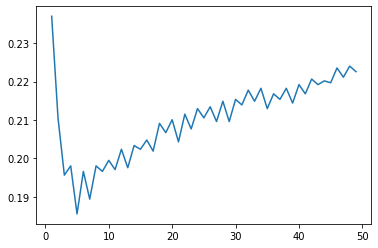

In [8]:
# cross validation
np.random.seed(42)
nruns=10
K=np.arange(1,50)
miserror=np.zeros((nruns,len(K)))

for i in range(nruns):
    X_train, X_val, y_train, y_val = train_test_split(features, df_scale['Lead'], test_size = .2)
     
    for j,k in enumerate(K):
        model=sklnb.KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train,y_train)
        prediction=model.predict(X_val)
        miserror[i,j] = (np.mean(prediction != y_val))

ave_miserror=np.mean(miserror,axis=0)
plt.plot(K,ave_miserror)
plt.show()

In [9]:
# get the good k
mindx=np.argmin(ave_miserror)
print(K[mindx],1-ave_miserror[mindx])

5 0.8144230769230769


In [11]:
# validation performance
X_train, X_val, y_train, y_val = train_test_split(features, df_scale['Lead'], test_size = .2)
model2=sklnb.KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)
prediction=model2.predict(X_val)
performace(y_val,prediction)

confusionmatrix:
[[154   6]
 [ 31  17]]
accuracy:0.8221153846153846
precision:0.7391304347826086
recall:0.3541666666666667
F1-score:0.4788732394366197


# Features selection

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature selection
def select_features(x,y,k):
    fs = SelectKBest(score_func=chi2, k=k)
    fs.fit(x, y)
    X_fs = fs.transform(x)
    return X_fs,fs

In [13]:
# feature selection
X_fs,fs=select_features(df.drop(columns=['Lead']), df['Lead'],5)

Feature 0: 4941.990647
Feature 1: 30105.306110
Feature 2: 24307.234060
Feature 3: 82016.532631
Feature 4: 84.472926
Feature 5: 0.265082
Feature 6: 102.118345
Feature 7: 5075.660054
Feature 8: 465.449958
Feature 9: 0.671512
Feature 10: 4.338742
Feature 11: 172.129735
Feature 12: 146.416376


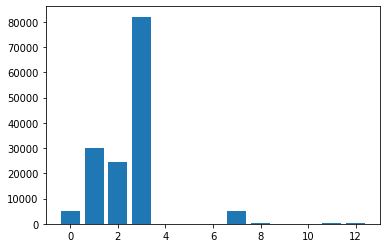

In [14]:
# get the features scores
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [15]:
#standardized data
scaler = StandardScaler()

# Scale the data
X_fs = scaler.fit_transform(X_fs)

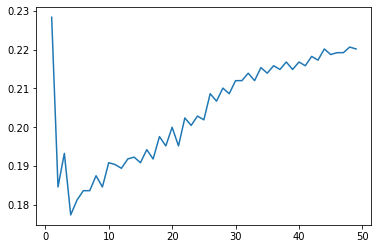

In [16]:
# cross validation
np.random.seed(50)
nruns=10
K=np.arange(1,50)
miserror=np.zeros((nruns,len(K)))

for i in range(nruns):
    X_train, X_val, y_train, y_val = train_test_split(X_fs, df['Lead'], test_size = .2)
     
    for j,k in enumerate(K):
        model=sklnb.KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train,y_train)
        prediction=model.predict(X_val)
        miserror[i,j] = (np.mean(prediction != y_val))

ave_miserror=np.mean(miserror,axis=0)
plt.plot(K,ave_miserror)
plt.show()

In [17]:
# get the good k
mindx=np.argmin(ave_miserror)
print(K[mindx],1-ave_miserror[mindx])

4 0.8225961538461538


In [25]:
# validation performance
X_train, X_val, y_train, y_val = train_test_split(X_fs, df['Lead'], test_size = .2)
model=sklnb.KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
prediction=model.predict(X_val)
performace(y_val,prediction)

confusionmatrix:
[[157   3]
 [ 27  21]]
accuracy:0.8557692307692307
precision:0.875
recall:0.4375
F1-score:0.5833333333333334
